In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pickle

In [152]:
df = pd.read_csv(r'C:\Users\hrish\Desktop\BITS 4th Yr\Sem 8\ME F266 SoP\Airbag data with DIndex.csv',header=0, index_col = 0)
df.head()

,Acc_x,Topple_rate,Roll_rate,Acc_y,Accident,Airbag,Composite_Score
0,128.533345,13.765434,41.482979,11.257175,1,1,0.533881
1,10.746493,19.325247,27.000041,11.081004,0,0,0.193402
2,68.857225,16.352830,41.796872,12.836890,0,0,0.445423
3,43.260996,4.795048,16.012463,17.343162,0,0,0.284977
4,85.755633,18.372263,9.304257,19.913530,0,0,0.434853


In [153]:
df.head()

,Acc_x,Topple_rate,Roll_rate,Acc_y,Accident,Airbag,Composite_Score
0,128.533345,13.765434,41.482979,11.257175,1,1,0.533881
1,10.746493,19.325247,27.000041,11.081004,0,0,0.193402
2,68.857225,16.352830,41.796872,12.836890,0,0,0.445423
3,43.260996,4.795048,16.012463,17.343162,0,0,0.284977
4,85.755633,18.372263,9.304257,19.913530,0,0,0.434853


C:\Users\hrish\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


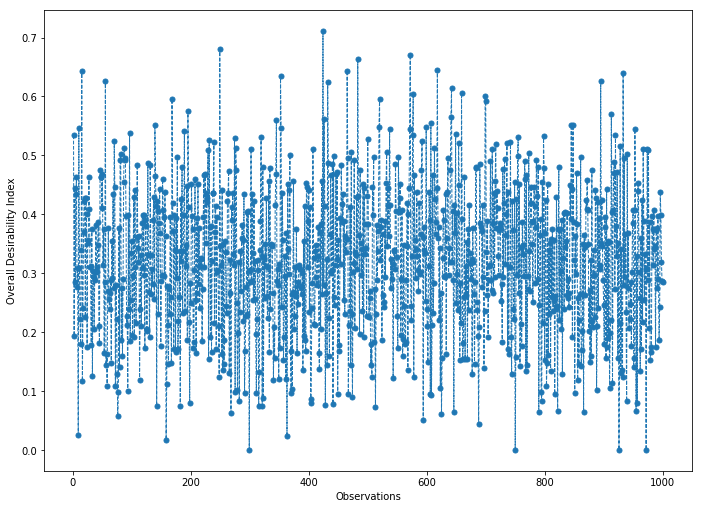

In [154]:
fig = plt.figure(figsize=(15,8))

axis = fig.add_axes([0.1,0.6,0.6,0.8])
axis.plot(range(1,1001),df['Composite_Score'],marker='o', linestyle='dashed',linewidth=1, markersize=5)
axis.set_xlabel("Observations")
axis.set_ylabel("Overall Desirability Index")
plt.tight_layout()

# Linear Regression

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [156]:
X = df.loc['0':,'Acc_x':'Acc_y']
y = df['Composite_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =101 )

In [157]:
linear_model = LinearRegression()

In [158]:
linear_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [159]:
linear_pred = linear_model.predict(X_test)

In [160]:
from sklearn import metrics

In [161]:
print('METRICS FOR LINEAR REGRESSION: \n')
print('Mean Square Error: ' + str(metrics.mean_squared_error(y_test, linear_pred)))
print('Mean Absolute Error: ' + str(metrics.mean_absolute_error(y_test, linear_pred)))
print('R2 Score: ' + str(metrics.r2_score(y_test, linear_pred)))
print('Accuracy: ' + str(100 - (metrics.mean_absolute_error(y_test, linear_pred) * 100) / (np.mean(y_test))) + '%')

METRICS FOR LINEAR REGRESSION: 

Mean Square Error: 0.0019819414896551884
Mean Absolute Error: 0.03340708634870886
R2 Score: 0.8827826052768283
Accuracy: 89.4578525166447%


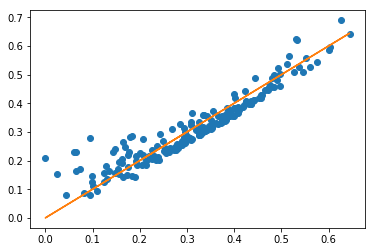

In [162]:
plt.plot(y_test,linear_pred,marker='o',linewidth=0)
plt.plot(y_test,y_test)

In [163]:
error_lr = []
err =0
for i in range(y_test.shape[0]):
    if y_test[y_test.index[i]] != 0:
        err = ((y_test[y_test.index[i]]-linear_pred[i])/y_test[y_test.index[i]])*100
        error_lr.append(err)
        
    else: continue

In [164]:
a = y_test >0
a.count()

200

In [165]:
from scipy import stats

In [166]:
stats.describe(error_lr)

DescribeResult(nobs=199, minmax=(-489.72814584861493, 24.53931704943118), mean=-7.246018490062117, variance=2500.675676960006, skewness=-6.387203773653164, kurtosis=49.53684711787919)

In [167]:
'''for i in range(0,399):
    if np.absolute(error_lr[i]) >= 1000:
        print(y_test.index[i])
'''

'for i in range(0,399):\n    if np.absolute(error_lr[i]) >= 1000:\n        print(y_test.index[i])\n'

In [168]:
np.size(error_lr)

199

Text(0.5,1,'LINEAR REGRESSION MODEL')

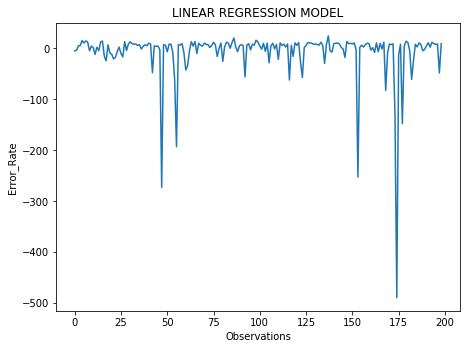

In [169]:
fig = plt.figure(figsize=(8,8))

axis = fig.add_axes([0.1,0.2,0.7,0.5])
axis.plot(range(np.size(error_lr)),error_lr)
axis.set_xlabel('Observations')
axis.set_ylabel('Error_Rate')
axis.set_title("LINEAR REGRESSION MODEL")

In [170]:
#fig.savefig(r'C:\Users\hrish\Desktop\BITS 4th Yr\Sem 8\ME F266 SOP\Visualizations\Linear_error.jpg')

# Support Vector machines

In [171]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [172]:
#svm_params = {'C': [1,10,100], 'kernel':['rbf', 'sigmoid'], 'degree': list(range(1,5)), 'gamma':[1,0.1,.01,.0001]}

In [173]:
#grid_svm_model = GridSearchCV(SVR(),svm_params,verbose = 4)

In [174]:
#grid_svm_model.fit(X_train,y_train)

In [175]:
#grid_svm_model.best_params_

In [176]:
#grid_svm_model.best_score_
#pickle.dump(grid_svm_model, open('Hypertuned SVM Model', 'wb'))

In [177]:
model_svm = pickle.load(open('Hypertuned SVM Model','rb'))
print(model_svm.best_params_)
print(model_svm.best_score_)

{'C': 100, 'degree': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.8183530595276833


In [178]:
grid_svm_pred = model_svm.predict(X_test)

In [179]:
print('METRICS FOR HYPERTUNED SVM REGRESSOR: \n')
print('Mean Square Error: ' + str(metrics.mean_squared_error(y_test, grid_svm_pred)))
print('Mean Absolute Error: ' + str(metrics.mean_absolute_error(y_test, grid_svm_pred)))
print('R2 Score: ' + str(metrics.r2_score(y_test, grid_svm_pred)))
print('Accuracy: ' + str(100 - (metrics.mean_absolute_error(y_test, grid_svm_pred) * 100) / (np.mean(y_test))) + '%')

METRICS FOR HYPERTUNED SVM REGRESSOR: 

Mean Square Error: 0.0016500214834530343
Mean Absolute Error: 0.032182287123241296
R2 Score: 0.9024132546106208
Accuracy: 89.84435776099917%


In [180]:
error_svm_grid = []
err =0

for i in range(y_test.shape[0]):
    if y_test[y_test.index[i]] != 0:
        err = ((y_test[y_test.index[i]]-grid_svm_pred[i])/y_test[y_test.index[i]])*100
        error_svm_grid.append(err)
        
    else: continue

In [181]:
stats.describe(error_svm_grid)

DescribeResult(nobs=199, minmax=(-210.82735779758113, 69.77521987005575), mean=2.463964096547218, variance=709.1333580676506, skewness=-4.124487559025472, kurtosis=28.37798414408249)

Text(0.5,1,'SUPPORT VECTOR MACHINE REGRESSOR')

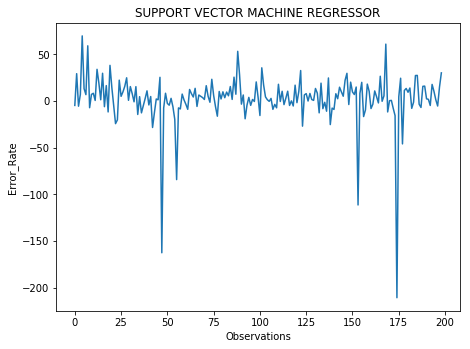

In [182]:
fig = plt.figure(figsize=(8,8))

axis = fig.add_axes([0.1,0.2,0.7,0.5])
axis.plot(range(np.size(error_svm_grid)),error_svm_grid)

axis.set_xlabel('Observations')
axis.set_ylabel('Error_Rate')
axis.set_title("SUPPORT VECTOR MACHINE REGRESSOR")

In [183]:
#fig.savefig(r'C:\Users\hrish\Desktop\BITS 4th Yr\Sem 8\ME F266 SOP\Visualizations\SVM_error.jpg')

# Decision Trees and Random Forest

In [184]:
from sklearn.tree import DecisionTreeRegressor

In [185]:
dtree_model = DecisionTreeRegressor()

In [186]:
dtree_model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [187]:
dtree_pred = dtree_model.predict(X_test)

In [188]:
print('METRICS FOR DECISION TREE REGRESSOR: \n')
print('Mean Square Error: ' + str(metrics.mean_squared_error(y_test, dtree_pred)))
print('Mean Absolute Error: ' + str(metrics.mean_absolute_error(y_test, dtree_pred)))
print('R2 Score: ' + str(metrics.r2_score(y_test, dtree_pred)))
print('Accuracy: ' + str(100 - (metrics.mean_absolute_error(y_test, dtree_pred) * 100) / (np.mean(y_test))) + '%')

METRICS FOR DECISION TREE REGRESSOR: 

Mean Square Error: 0.0009027490531732365
Mean Absolute Error: 0.021609414506666667
R2 Score: 0.9466089727400647
Accuracy: 93.18079905621455%


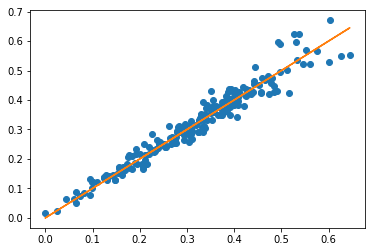

In [189]:
plt.plot(y_test, dtree_pred,marker='o',linewidth=0)
plt.plot(y_test,y_test)

In [190]:
error_dtree = []
err =0

for i in range(y_test.shape[0]):
    if y_test[y_test.index[i]] != 0:
        err = ((y_test[y_test.index[i]]-dtree_pred[i])/y_test[y_test.index[i]])*100
        error_dtree.append(err)
        
    else: continue

In [191]:
stats.describe(error_dtree)

DescribeResult(nobs=199, minmax=(-44.12796920071305, 20.627130443330287), mean=-1.293756665889461, variance=101.53711416410589, skewness=-0.87324195559718, kurtosis=1.964755971300212)

Text(0.5,1,'DECISION TREE MODEL')

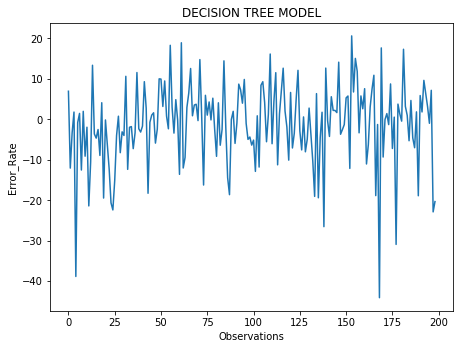

In [192]:
fig = plt.figure(figsize=(8,8))

axis = fig.add_axes([0.1,0.2,0.7,0.5])
axis.plot(range(np.size(error_dtree)),error_dtree)

axis.set_xlabel('Observations')
axis.set_ylabel('Error_Rate')
axis.set_title("DECISION TREE MODEL")

In [193]:
#fig.savefig(r'C:\Users\hrish\Desktop\BITS 4th Yr\Sem 8\ME F266 SOP\Visualizations\dtree_error.jpg')

In [194]:
from sklearn.ensemble import RandomForestRegressor

In [195]:
forest_model = RandomForestRegressor(n_estimators=10)

In [196]:
forest_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [197]:
forest_pred = forest_model.predict(X_test)

In [198]:
print('METRICS FOR RANDOM FOREST REGRESSOR: \n')
print('Mean Square Error: ' + str(metrics.mean_squared_error(y_test, forest_pred)))
print('Mean Absolute Error: ' + str(metrics.mean_absolute_error(y_test, forest_pred)))
print('R2 Score: ' + str(metrics.r2_score(y_test, forest_pred)))
print('Accuracy: ' + str(100 - (metrics.mean_absolute_error(y_test, forest_pred) * 100) / (np.mean(y_test))) + '%')

METRICS FOR RANDOM FOREST REGRESSOR: 

Mean Square Error: 0.00034977932690335984
Mean Absolute Error: 0.013024514746373807
R2 Score: 0.9793131020054636
Accuracy: 95.88990330009085%


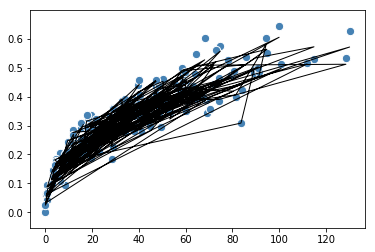

In [199]:
plt.scatter(X_test['Acc_x'], y_test, c='steelblue', edgecolor='white', s=70)
plt.plot(X_test['Acc_x'],forest_pred, linewidth =1, color = 'black' )

In [200]:
error_forest = []
err =0
for i in range(y_test.shape[0]):
    if y_test[y_test.index[i]] != 0:
        err = ((y_test[y_test.index[i]]-forest_pred[i])/y_test[y_test.index[i]])*100
        error_forest.append(err)
        
    else: continue

In [201]:
stats.describe(error_forest)

DescribeResult(nobs=199, minmax=(-43.146776177935166, 23.034638486493144), mean=-1.135071903241987, variance=66.63150803354185, skewness=-1.8829199751198262, kurtosis=6.973878545366128)

Text(0.5,1,'RANDOM FOREST MODEL')

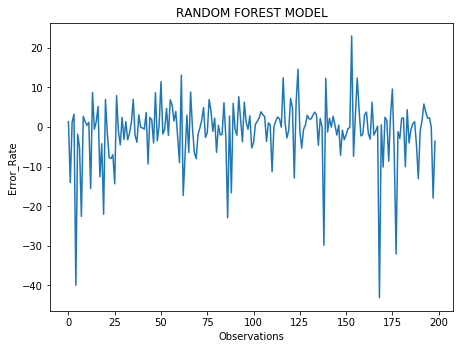

In [202]:
fig = plt.figure(figsize=(8,8))

axis = fig.add_axes([0.1,0.2,0.7,0.5])
axis.plot(range(np.size(error_forest)),error_forest)

axis.set_xlabel('Observations')
axis.set_ylabel('Error_Rate')
axis.set_title("RANDOM FOREST MODEL")

In [203]:
#fig.savefig(r'C:\Users\hrish\Desktop\BITS 4th Yr\Sem 8\ME F266 SOP\Visualizations\rforest_error.jpg')

## Hypertuned D_Tree and R_Forest

In [204]:
#dtree_params = {'criterion': ["mse", "mae"], 'splitter': ["best", 'random'], 'max_features': [ 'auto', 'sqrt', 'log2']}

In [205]:
#grid_dtree = GridSearchCV(DecisionTreeRegressor(), dtree_params, verbose =3)

In [206]:
#grid_dtree.fit(X_train,y_train)

In [207]:
#grid_dtree.best_params_
#pickle.dump(grid_dtree, open('Hypertuned Decision Tree', 'wb'))

In [208]:
model_dtree = pickle.load(open('Hypertuned Decision Tree','rb'))
print(model_dtree.best_params_)
print(model_dtree.best_score_)

{'criterion': 'mse', 'max_features': 'auto', 'splitter': 'best'}
0.9097364547848121


In [209]:
grid_1 = model_dtree.predict(X_test)

In [210]:
error_grid_dtree = []
err = 0
for i in range(y_test.shape[0]):
    if y_test[y_test.index[i]] != 0:
        err = ((y_test[y_test.index[i]]-grid_1[i])/y_test[y_test.index[i]])*100
        error_grid_dtree.append(err)
        
    else: continue

In [211]:
print('METRICS FOR HYPERTUNED DECISION TREE REGRESSOR: \n')
print('Mean Square Error: ' + str(metrics.mean_squared_error(y_test, grid_1)))
print('Mean Absolute Error: ' + str(metrics.mean_absolute_error(y_test, grid_1)))
print('R2 Score: ' + str(metrics.r2_score(y_test, grid_1)))
print('Accuracy: ' + str(100 - (metrics.mean_absolute_error(y_test, grid_1) * 100) / (np.mean(y_test))) + '%')

METRICS FOR HYPERTUNED DECISION TREE REGRESSOR: 

Mean Square Error: 0.00015810102513760156
Mean Absolute Error: 0.004359113550000001
R2 Score: 0.9906494766034105
Accuracy: 98.62441107670652%


In [212]:
stats.describe(error_grid_dtree)

DescribeResult(nobs=199, minmax=(-34.56687420312654, 16.963237661758015), mean=-0.4488834721633158, variance=21.19449879600298, skewness=-2.5841341623008534, kurtosis=18.58629869112842)

Text(0.5,1,'HYPERTUNED DECISION TREE MODEL')

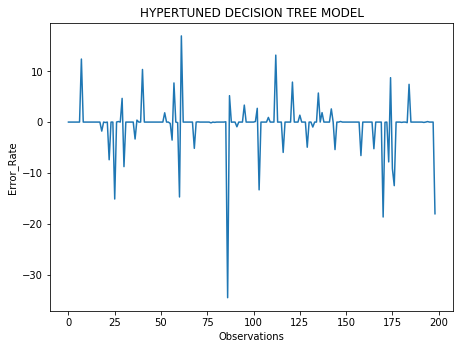

In [213]:
fig = plt.figure(figsize=(8,8))

axis = fig.add_axes([0.1,0.2,0.7,0.5])
axis.plot(range(np.size(error_grid_dtree)),error_grid_dtree)

axis.set_xlabel('Observations')
axis.set_ylabel('Error_Rate')
axis.set_title("HYPERTUNED DECISION TREE MODEL")

In [214]:
#fig.savefig(r'C:\Users\hrish\Desktop\BITS 4th Yr\Sem 8\ME F266 SOP\Visualizations\hyper_dtree_error.jpg')

In [215]:
#forest_params = {'n_estimators': list(range(1,50)), 'criterion': ["mse", "mae"], 'min_samples_split': list(range(2,10)),'max_features': [ 'auto', 'sqrt', 'log2']}

In [216]:
#grid_forest = GridSearchCV(RandomForestRegressor(),forest_params,verbose =3)

In [217]:
#grid_forest.fit(X_train,y_train)

In [218]:
#grid_forest.best_score_

In [219]:
#grid_forest.best_params_
#pickle.dump(grid_forest, open('Hypertuned Random Forest', 'wb'))

In [220]:
model_rforest = pickle.load(open('Hypertuned Random Forest','rb'))
print(model_rforest.best_params_)
print(model_rforest.best_score_)

{'criterion': 'mse', 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 36}
0.9507514124300107


In [221]:
grid_2 = model_rforest.predict(X_test)

In [222]:
error_grid_forest = []
err =0
for i in range(y_test.shape[0]):
    if y_test[y_test.index[i]] != 0:
        err = ((y_test[y_test.index[i]]-grid_2[i])/y_test[y_test.index[i]])*100
        error_grid_forest.append(err)
        
    else: continue

In [223]:
print('METRICS FOR HYPERTUNED RANDOM FOREST REGRESSOR: \n')
print('Mean Square Error: ' + str(metrics.mean_squared_error(y_test, grid_2)))
print('Mean Absolute Error: ' + str(metrics.mean_absolute_error(y_test, grid_2)))
print('R2 Score: ' + str(metrics.r2_score(y_test, grid_2)))
print('Accuracy: ' + str(100 - (metrics.mean_absolute_error(y_test, grid_2) * 100) / (np.mean(y_test))) + '%')

METRICS FOR HYPERTUNED RANDOM FOREST REGRESSOR: 

Mean Square Error: 0.00010499126399267985
Mean Absolute Error: 0.0065488153050636535
R2 Score: 0.9937905319111838
Accuracy: 97.93341520219396%


In [224]:
stats.describe(error_grid_forest)

DescribeResult(nobs=199, minmax=(-189.56947256332288, 11.388848796705624), mean=-1.570223109707883, variance=198.51524554702053, skewness=-12.100200691649757, kurtosis=158.0545025808909)

Text(0.5,1,'HYPERTUNED RANDOM FOREST MODEL')

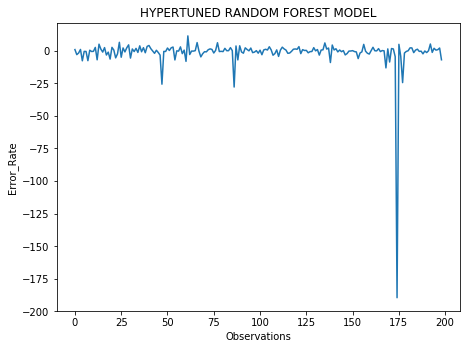

In [225]:
fig = plt.figure(figsize=(8,8))

axis = fig.add_axes([0.1,0.2,0.7,0.5])
axis.plot(range(np.size(error_grid_forest)),error_grid_forest)

axis.set_xlabel('Observations')
axis.set_ylabel('Error_Rate')
axis.set_title("HYPERTUNED RANDOM FOREST MODEL")

In [226]:
#fig.savefig(r'C:\Users\hrish\Desktop\BITS 4th Yr\Sem 8\ME F266 SOP\Visualizations\hyper_rforest_error.jpg')

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

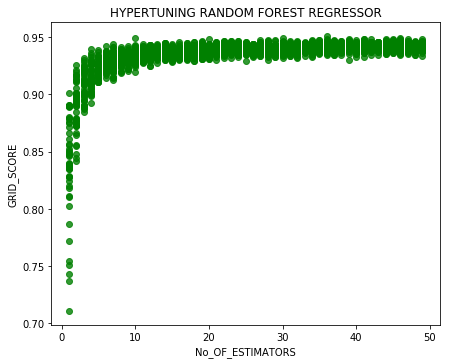

In [227]:
hidden =[]
for i in range(model_rforest.cv_results_['mean_test_score'].shape[0]):
    
    hidden.append(model_rforest.cv_results_['params'][i]['n_estimators'])
    
rforest_scores = []

for i in range(model_rforest.cv_results_['mean_test_score'].shape[0]):
    
    rforest_scores.append(model_rforest.cv_results_['mean_test_score'][i])

fig = plt.figure(figsize=(6,6))

axis = fig.add_axes([0.1,0.6,0.9,0.7])
axis.plot(hidden,rforest_scores,color='green', marker='o', linestyle=None ,linewidth=0, markersize=6, alpha =0.8)
axis.set_xlabel('No_OF_ESTIMATORS')
axis.set_ylabel('GRID_SCORE')
axis.set_title('HYPERTUNING RANDOM FOREST REGRESSOR')

plt.tight_layout

In [228]:
#fig.savefig(r'C:\Users\hrish\Desktop\BITS 4th Yr\Sem 8\ME F266 SOP\Visualizations\hyer_rforest.jpg')

## Ensemble Models

### 1. Gradient Boosting Regressor

In [229]:
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor

In [230]:
grades = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls')

In [231]:
grades.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=1,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [232]:
pred_grades = grades.predict(X_test)

In [233]:
print('METRICS FOR GRADIENT BOOSTING REGRESSOR: \n')
print('Mean Square Error: ' + str(metrics.mean_squared_error(y_test, pred_grades)))
print('Mean Absolute Error: ' + str(metrics.mean_absolute_error(y_test, pred_grades)))
print('R2 Score: ' + str(metrics.r2_score(y_test, pred_grades)))
print('Accuracy: ' + str(100 - (metrics.mean_absolute_error(y_test, pred_grades) * 100) / (np.mean(y_test))) + '%')

METRICS FOR GRADIENT BOOSTING REGRESSOR: 

Mean Square Error: 0.0010122226529691771
Mean Absolute Error: 0.0213809792496132
R2 Score: 0.9401344071557498
Accuracy: 93.2528855035365%


DescribeResult(nobs=199, minmax=(-262.68719953711764, 26.634571027602988), mean=-3.734424560547049, variance=599.004202858076, skewness=-7.181184307837634, kurtosis=65.9431918902775)


Text(0.5,1,'GRADIENT BOOSTING MODEL')

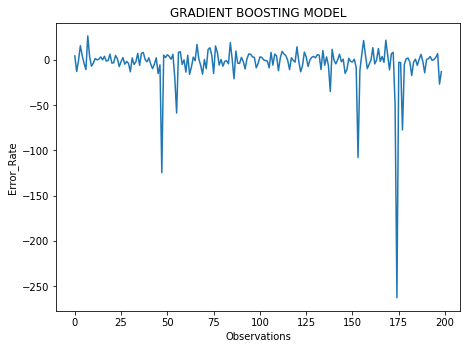

In [234]:
error_grades = []
err =0
for i in range(y_test.shape[0]):
    if y_test[y_test.index[i]] != 0:
        err = ((y_test[y_test.index[i]]-pred_grades[i])/y_test[y_test.index[i]])*100
        error_grades.append(err)
        
    else: continue
        
print(stats.describe(error_grades))

fig = plt.figure(figsize=(8,8))

axis = fig.add_axes([0.1,0.2,0.7,0.5])
axis.plot(range(np.size(error_grades)),error_grades)

axis.set_xlabel('Observations')
axis.set_ylabel('Error_Rate')
axis.set_title("GRADIENT BOOSTING MODEL")

In [235]:
#fig.savefig(r'C:\Users\hrish\Desktop\BITS 4th Yr\Sem 8\ME F266 SOP\Visualizations\gradient_boosting_error.jpg')

In [236]:
#grades_params = {'loss': ['ls', 'lad', 'huber', 'quantile'], 'learning_rate':[0.001,0.01,0.1,1], 'n_estimators': range(1,101), 'max_depth': range(1,6) }

In [237]:
#grid_grades = GridSearchCV(GradientBoostingRegressor(),grades_params,verbose=2)

In [238]:
#grid_grades.fit(X_train,y_train)

In [239]:
#print(grid_grades.best_params_)
#print(grid_grades.best_score_)
#pickle.dump(grid_grades, open('Hypertuned Gradient Boosting', 'wb'))

In [240]:
model_grades = pickle.load(open('Hypertuned Gradient Boosting','rb'))
print(model_grades.best_params_)
print(model_grades.best_score_)

{'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 4, 'n_estimators': 100}
0.9659780631566758


In [241]:
grid_grades_pred = model_grades.predict(X_test)

In [242]:
print('METRICS FOR HYPERTUNED GRADIENT BOOSTING REGRESSOR: \n')
print('Mean Square Error: ' + str(metrics.mean_squared_error(y_test, grid_grades_pred)))
print('Mean Absolute Error: ' + str(metrics.mean_absolute_error(y_test, grid_grades_pred)))
print('R2 Score: ' + str(metrics.r2_score(y_test, grid_grades_pred)))
print('Accuracy: ' + str(100 - (metrics.mean_absolute_error(y_test, grid_grades_pred) * 100) / (np.mean(y_test))) + '%')

METRICS FOR HYPERTUNED GRADIENT BOOSTING REGRESSOR: 

Mean Square Error: 6.7213891048726e-05
Mean Absolute Error: 0.0053002656600684775
R2 Score: 0.996024788199318
Accuracy: 98.32741527632311%


DescribeResult(nobs=199, minmax=(-30.03062388202925, 10.991535789108784), mean=-0.5435209786792718, variance=15.488295432227254, skewness=-3.5069352966632215, kurtosis=21.843664439731068)


Text(0.5,1,'HYPERTUNED GRADIENT BOOSTING MODEL')

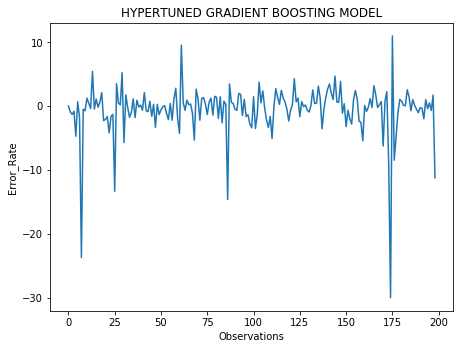

In [243]:
error_grid_grades = []
err =0
for i in range(y_test.shape[0]):
    if y_test[y_test.index[i]] != 0:
        err = ((y_test[y_test.index[i]]-grid_grades_pred[i])/y_test[y_test.index[i]])*100
        error_grid_grades.append(err)
        
    else: continue
        
print(stats.describe(error_grid_grades))

fig = plt.figure(figsize=(8,8))

axis = fig.add_axes([0.1,0.2,0.7,0.5])
axis.plot(range(np.size(error_grid_grades)),error_grid_grades)

axis.set_xlabel('Observations')
axis.set_ylabel('Error_Rate')
axis.set_title("HYPERTUNED GRADIENT BOOSTING MODEL")

In [244]:
#fig.savefig(r'C:\Users\hrish\Desktop\BITS 4th Yr\Sem 8\ME F266 SOP\Visualizations\hyper_gradient_boosting_error.jpg')

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

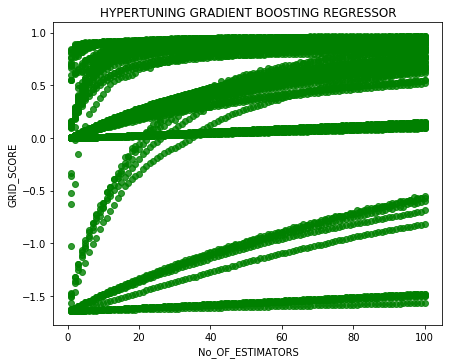

In [245]:
hidden =[]
for i in range(model_grades.cv_results_['mean_test_score'].shape[0]):
    
    hidden.append(model_grades.cv_results_['params'][i]['n_estimators'])
    
grades_scores = []

for i in range(model_grades.cv_results_['mean_test_score'].shape[0]):
    
    grades_scores.append(model_grades.cv_results_['mean_test_score'][i])

fig = plt.figure(figsize=(6,6))

axis = fig.add_axes([0.1,0.6,0.9,0.7])
axis.plot(hidden,grades_scores,color='green',marker='o', linestyle=None ,linewidth=0, markersize=6, alpha =0.8)
axis.set_xlabel('No_OF_ESTIMATORS')
axis.set_ylabel('GRID_SCORE')
axis.set_title('HYPERTUNING GRADIENT BOOSTING REGRESSOR')

plt.tight_layout

In [246]:
#fig.savefig(r'C:\Users\hrish\Desktop\BITS 4th Yr\Sem 8\ME F266 SOP\Visualizations\hyper_gradient_boosting.jpg')

### 2. Bagging Regressor

In [247]:
bag = BaggingRegressor(base_estimator = GradientBoostingRegressor(learning_rate= 0.1, loss= 'ls', max_depth= 4, n_estimators= 100))

In [248]:
bag.fit(X_train,y_train)

BaggingRegressor(base_estimator=GradientBoostingRegressor(alpha=0.9,
                                                          ccp_alpha=0.0,
                                                          criterion='friedman_mse',
                                                          init=None,
                                                          learning_rate=0.1,
                                                          loss='ls',
                                                          max_depth=4,
                                                          max_features=None,
                                                          max_leaf_nodes=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
       

In [249]:
bag_pred = bag.predict(X_test)

In [250]:
print('METRICS FOR BAGGING REGRESSOR USING GRADIENT BOOSTING: \n')
print('Mean Square Error: ' + str(metrics.mean_squared_error(y_test, bag_pred)))
print('Mean Absolute Error: ' + str(metrics.mean_absolute_error(y_test, bag_pred)))
print('R2 Score: ' + str(metrics.r2_score(y_test, bag_pred)))
print('Accuracy: ' + str(100 - (metrics.mean_absolute_error(y_test, bag_pred) * 100) / (np.mean(y_test))) + '%')

METRICS FOR BAGGING REGRESSOR USING GRADIENT BOOSTING: 

Mean Square Error: 0.00014270441332403378
Mean Absolute Error: 0.008259939549406148
R2 Score: 0.9915600739816733
Accuracy: 97.3934422168845%


DescribeResult(nobs=199, minmax=(-55.32092575904518, 10.716196640515845), mean=-1.257226878218111, variance=44.1613249775041, skewness=-4.31639561505949, kurtosis=28.021302315395115)


Text(0.5,1,'BAGGING REGRESSOR MODEL USING GRADIENT BOOSTING')

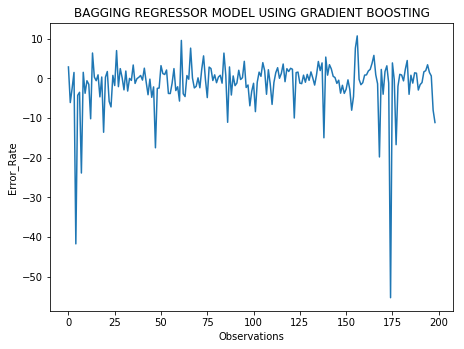

In [251]:
error_bag = []
err =0
for i in range(y_test.shape[0]):
    if y_test[y_test.index[i]] != 0:
        err = ((y_test[y_test.index[i]]-bag_pred[i])/y_test[y_test.index[i]])*100
        error_bag.append(err)
        
    else: continue
        
print(stats.describe(error_bag))

fig = plt.figure(figsize=(8,8))

axis = fig.add_axes([0.1,0.2,0.7,0.5])
axis.plot(range(np.size(error_bag)),error_bag)

axis.set_xlabel('Observations')
axis.set_ylabel('Error_Rate')
axis.set_title("BAGGING REGRESSOR MODEL USING GRADIENT BOOSTING")

In [252]:
#fig.savefig(r'C:\Users\hrish\Desktop\BITS 4th Yr\Sem 8\ME F266 SOP\Visualizations\bagging_error.jpg')

### 3. AdaBoost Regressor

In [253]:
from sklearn.ensemble import AdaBoostRegressor

In [254]:
ada = AdaBoostRegressor()

In [255]:
ada.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [256]:
ada_pred = ada.predict(X_test)

In [257]:
print('METRICS FOR ADABOOST REGRESSOR: \n')
print('Mean Square Error: ' + str(metrics.mean_squared_error(y_test, ada_pred)))
print('Mean Absolute Error: ' + str(metrics.mean_absolute_error(y_test, ada_pred)))
print('R2 Score: ' + str(metrics.r2_score(y_test, ada_pred)))
print('Accuracy: ' + str(100 - (metrics.mean_absolute_error(y_test, ada_pred) * 100) / (np.mean(y_test))) + '%')

METRICS FOR ADABOOST REGRESSOR: 

Mean Square Error: 0.0013664029473800653
Mean Absolute Error: 0.028185186492256886
R2 Score: 0.9191872240073952
Accuracy: 91.10570764101584%


DescribeResult(nobs=199, minmax=(-393.2390281243246, 24.87300293524458), mean=-4.579950747656969, variance=1138.4325062020937, skewness=-8.263331125689167, kurtosis=87.98925456354053)


Text(0.5,1,'ADA BOOST MODEL')

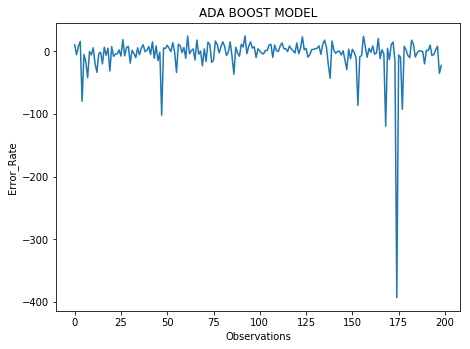

In [258]:
error_ada = []
err =0
for i in range(y_test.shape[0]):
    if y_test[y_test.index[i]] != 0:
        err = ((y_test[y_test.index[i]]-ada_pred[i])/y_test[y_test.index[i]])*100
        error_ada.append(err)
        
    else: continue
        
print(stats.describe(error_ada))

fig = plt.figure(figsize=(8,8))

axis = fig.add_axes([0.1,0.2,0.7,0.5])
axis.plot(range(np.size(error_ada)),error_ada)

axis.set_xlabel('Observations')
axis.set_ylabel('Error_Rate')
axis.set_title("ADA BOOST MODEL")

In [259]:
#fig.savefig(r'C:\Users\hrish\Desktop\BITS 4th Yr\Sem 8\ME F266 SOP\Visualizations\ada_boost_error.jpg')

In [260]:
#ada_params = {'loss' : ['linear', 'square', 'exponential'], 'learning_rate': [0.001,0.01,0.1,1], 'n_estimators' : range(1,101)}

In [261]:
#grid_ada = GridSearchCV(AdaBoostRegressor(),ada_params,verbose=3)

In [262]:
#grid_ada.fit(X_train,y_train)

In [263]:
#print(grid_ada.best_params_)
#print(grid_ada.best_score_)
#pickle.dump(grid_ada, open('Hypertuned AdaBoost', 'wb'))

In [264]:
model_ada = pickle.load(open('Hypertuned AdaBoost','rb'))
print(model_ada.best_params_)
print(model_ada.best_score_)

{'learning_rate': 1, 'loss': 'square', 'n_estimators': 68}
0.8939036520808197


In [265]:
grid_ada_pred = model_ada.predict(X_test)

In [266]:
print('METRICS FOR HYPERTUNED ADABOOST REGRESSOR: \n')
print('Mean Square Error: ' + str(metrics.mean_squared_error(y_test, grid_ada_pred)))
print('Mean Absolute Error: ' + str(metrics.mean_absolute_error(y_test, grid_ada_pred)))
print('R2 Score: ' + str(metrics.r2_score(y_test, grid_ada_pred)))
print('Accuracy: ' + str(100 - (metrics.mean_absolute_error(y_test, grid_ada_pred) * 100) / (np.mean(y_test))) + '%')

METRICS FOR HYPERTUNED ADABOOST REGRESSOR: 

Mean Square Error: 0.0011227354618157676
Mean Absolute Error: 0.02729981244755209
R2 Score: 0.9335983799298447
Accuracy: 91.38510176894982%


DescribeResult(nobs=199, minmax=(-356.1132715821436, 44.10325973098056), mean=-2.5154935840372343, variance=1036.881892821305, skewness=-7.56791890275462, kurtosis=74.61575383804063)


Text(0.5,1,'HYPERTUNED ADA BOOST MODEL')

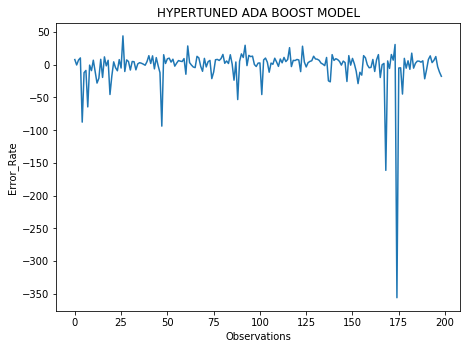

In [267]:
error_grid_ada = []
err =0
for i in range(y_test.shape[0]):
    if y_test[y_test.index[i]] != 0:
        err = ((y_test[y_test.index[i]]-grid_ada_pred[i])/y_test[y_test.index[i]])*100
        error_grid_ada.append(err)
        
    else: continue
        
print(stats.describe(error_grid_ada))

fig = plt.figure(figsize=(8,8))

axis = fig.add_axes([0.1,0.2,0.7,0.5])
axis.plot(range(np.size(error_grid_ada)),error_grid_ada)

axis.set_xlabel('Observations')
axis.set_ylabel('Error_Rate')
axis.set_title("HYPERTUNED ADA BOOST MODEL")

In [268]:
#fig.savefig(r'C:\Users\hrish\Desktop\BITS 4th Yr\Sem 8\ME F266 SOP\Visualizations\hyper_ada_boost_error.jpg')

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

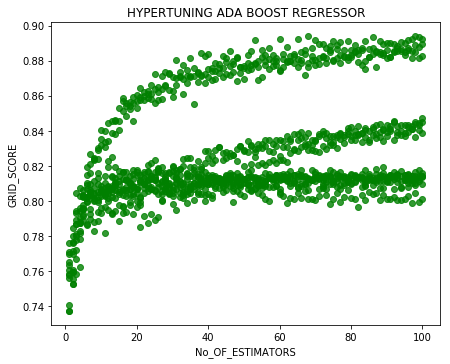

In [269]:
hidden =[]
for i in range(model_ada.cv_results_['mean_test_score'].shape[0]):
    
    hidden.append(model_ada.cv_results_['params'][i]['n_estimators'])
    
ada_scores = []

for i in range(model_ada.cv_results_['mean_test_score'].shape[0]):
    
    ada_scores.append(model_ada.cv_results_['mean_test_score'][i])

fig = plt.figure(figsize=(6,6))

axis = fig.add_axes([0.1,0.6,0.9,0.7])
axis.plot(hidden,ada_scores,color='green',marker='o', linestyle=None ,linewidth=0, markersize=6, alpha =0.8)
axis.set_xlabel('No_OF_ESTIMATORS')
axis.set_ylabel('GRID_SCORE')
axis.set_title('HYPERTUNING ADA BOOST REGRESSOR')

plt.tight_layout

In [270]:
#fig.savefig(r'C:\Users\hrish\Desktop\BITS 4th Yr\Sem 8\ME F266 SOP\Visualizations\hyper_ada_boosting.jpg')

## Multi Level Perceptron

In [271]:
from sklearn.neural_network import MLPRegressor

In [272]:
mlp = MLPRegressor(activation='tanh', max_iter=100, hidden_layer_sizes=(50,20,40))

In [273]:
mlp.fit(X_train,y_train)

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 20, 40), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=100,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [274]:
mlp_pred = mlp.predict(X_test)

In [275]:
print('METRICS FOR MLP REGRESSOR: \n')
print('Mean Square Error: ' + str(metrics.mean_squared_error(y_test, mlp_pred)))
print('Mean Absolute Error: ' + str(metrics.mean_absolute_error(y_test, mlp_pred)))
print('R2 Score: ' + str(metrics.r2_score(y_test, mlp_pred)))
print('Accuracy: ' + str(100 - (metrics.mean_absolute_error(y_test, mlp_pred) * 100) / (np.mean(y_test))) + '%')

METRICS FOR MLP REGRESSOR: 

Mean Square Error: 0.004719023134468839
Mean Absolute Error: 0.05402297577609818
R2 Score: 0.7209041738376201
Accuracy: 82.95217451241844%


DescribeResult(nobs=199, minmax=(-424.45331325984637, 149.30683469832945), mean=-6.77563134374597, variance=1724.403234687511, skewness=-5.322450787934266, kurtosis=51.83666427457101)


Text(0.5,1,'MULTI-LAYER PERCEPTRON MODEL')

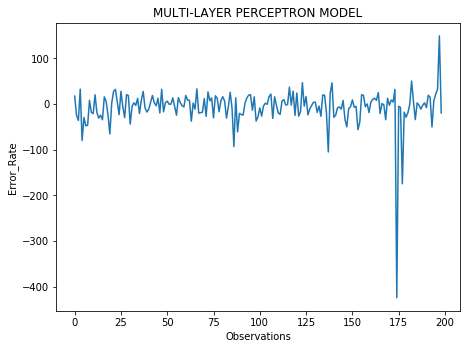

In [276]:
error_mlp = []
err =0
for i in range(y_test.shape[0]):
    if y_test[y_test.index[i]] != 0:
        err = ((y_test[y_test.index[i]]-mlp_pred[i])/y_test[y_test.index[i]])*100
        error_mlp.append(err)
        
    else: continue
        
print(stats.describe(error_mlp))

fig = plt.figure(figsize=(8,8))

axis = fig.add_axes([0.1,0.2,0.7,0.5])
axis.plot(range(np.size(error_mlp)),error_mlp)

axis.set_xlabel('Observations')
axis.set_ylabel('Error_Rate')
axis.set_title("MULTI-LAYER PERCEPTRON MODEL")

In [277]:
#fig.savefig(r'C:\Users\hrish\Desktop\BITS 4th Yr\Sem 8\ME F266 SOP\Visualizations\MLP_error.jpg')

In [278]:
#mlp_params = {'hidden_layer_sizes': [(10,8,5),(7,10,10),(100,)],'activation':['logistic', 'tanh', 'relu'], 'solver':['lbfgs', 'adam'], 'learning_rate':['constant', 'invscaling', 'adaptive'], 'learning_rate_init': [0.001,0.01,0.1]}

In [279]:
#grid_mlp = GridSearchCV(MLPRegressor(), mlp_params, verbose = 3)

In [280]:
#grid_mlp.fit(X_train,y_train)

In [281]:
#print(grid_mlp.best_params_)
#print(grid_mlp.best_score_)
#pickle.dump(grid_mlp, open('Hypertuned MLP', 'wb'))

In [282]:
model_mlp = pickle.load(open('Hypertuned MLP','rb'))
print(model_mlp.best_params_)
print(model_mlp.best_score_)

{'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.01, 'solver': 'lbfgs'}
0.9709947536626057


In [283]:
grid_mlp_pred = model_mlp.predict(X_test)

In [284]:
print('METRICS FOR HYPERTUNED MLP REGRESSOR: \n')
print('Mean Square Error: ' + str(metrics.mean_squared_error(y_test, grid_mlp_pred)))
print('Mean Absolute Error: ' + str(metrics.mean_absolute_error(y_test, grid_mlp_pred)))
print('R2 Score: ' + str(metrics.r2_score(y_test, grid_mlp_pred)))
print('Accuracy: ' + str(100 - (metrics.mean_absolute_error(y_test, grid_mlp_pred) * 100) / (np.mean(y_test))) + '%')

METRICS FOR HYPERTUNED MLP REGRESSOR: 

Mean Square Error: 0.00010950790221897675
Mean Absolute Error: 0.00610401496354495
R2 Score: 0.9935234056773585
Accuracy: 98.07377915827175%


DescribeResult(nobs=199, minmax=(-123.03713181530198, 20.381513587185438), mean=-1.3130165561188392, variance=120.76451471364865, skewness=-7.817618542217706, kurtosis=78.05815501778119)


Text(0.5,1,'HYPERTUNED MULTI-LAYER PERCEPTRON MODEL')

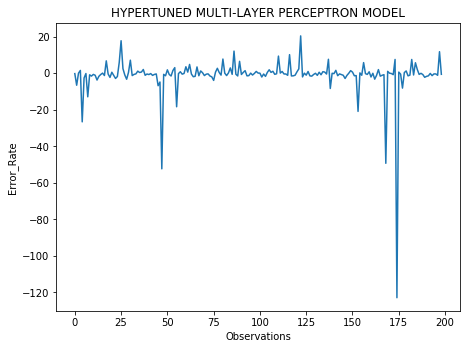

In [285]:
error_mlp_grid = []
err =0
for i in range(y_test.shape[0]):
    if y_test[y_test.index[i]] != 0:
        err = ((y_test[y_test.index[i]]-grid_mlp_pred[i])/y_test[y_test.index[i]])*100
        error_mlp_grid.append(err)
        
    else: continue
        
print(stats.describe(error_mlp_grid))

fig = plt.figure(figsize=(8,8))

axis = fig.add_axes([0.1,0.2,0.7,0.5])
axis.plot(range(np.size(error_mlp_grid)),error_mlp_grid)

axis.set_xlabel('Observations')
axis.set_ylabel('Error_Rate')
axis.set_title("HYPERTUNED MULTI-LAYER PERCEPTRON MODEL")

In [286]:
#fig.savefig(r'C:\Users\hrish\Desktop\BITS 4th Yr\Sem 8\ME F266 SOP\Visualizations\hyper_MLP_error.jpg')

## Voting Regressor (Ensemble Meta Estimator)

In [335]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

# Loading some example data
#X, y = load_boston(return_X_y=True)

# Training classifiers
reg1 = GradientBoostingRegressor(learning_rate= 0.1, loss= 'ls', max_depth= 4, n_estimators= 100)
reg2 = RandomForestRegressor(criterion = 'mse',max_features = 'sqrt', min_samples_split = 2, n_estimators= 36)
reg3 = BaggingRegressor(GradientBoostingRegressor(learning_rate= 0.1, loss= 'ls', max_depth= 4, n_estimators= 100))
reg4 = MLPRegressor(activation = 'logistic', hidden_layer_sizes = (100,), learning_rate = 'invscaling', learning_rate_init = 0.01, solver = 'lbfgs')

ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('br', reg3), ('mlp',reg4)])
ereg = ereg.fit(X_train, y_train)
ereg_pred = ereg.predict(X_test)
print('METRICS FOR VOTING REGRESSOR:' )
print('Mean Square Error: ' + str(metrics.mean_squared_error(y_test, ereg_pred)))
print('Mean Absolute Error: ' + str(metrics.mean_absolute_error(y_test, ereg_pred)))
print('R2 Score: ' + str(metrics.r2_score(y_test, ereg_pred)))
print('Accuracy: ' + str(100 - (metrics.mean_absolute_error(y_test, ereg_pred) * 100) / (np.mean(y_test))) + '%')

METRICS FOR VOTING REGRESSOR:
Mean Square Error: 0.00013409168461563548
Mean Absolute Error: 0.007338404994935714
R2 Score: 0.9920694541152068
Accuracy: 97.68424737968226%


C:\Users\hrish\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


DescribeResult(nobs=199, minmax=(-138.97771208949067, 10.481177339515273), mean=-1.5831597770587995, variance=135.05455949583325, skewness=-9.022793196290408, kurtosis=98.8088134656063)


Text(0.5,1,'HYPERTUNED VOTING REGRESSOR MODEL')

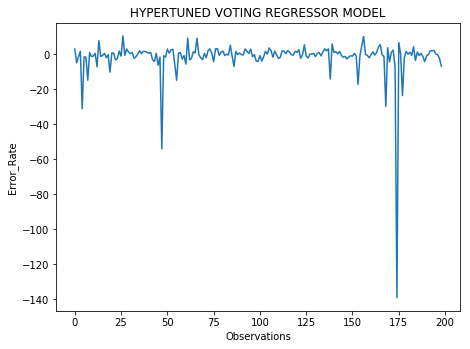

In [336]:
error_ereg = []
err =0
for i in range(y_test.shape[0]):
    if y_test[y_test.index[i]] != 0:
        err = ((y_test[y_test.index[i]]-ereg_pred[i])/y_test[y_test.index[i]])*100
        error_ereg.append(err)
        
    else: continue
        
print(stats.describe(error_ereg))

fig = plt.figure(figsize=(8,8))

axis = fig.add_axes([0.1,0.2,0.7,0.5])
axis.plot(range(np.size(error_ereg)),error_ereg)

axis.set_xlabel('Observations')
axis.set_ylabel('Error_Rate')
axis.set_title("HYPERTUNED VOTING REGRESSOR MODEL")

In [289]:
#fig.savefig(r'C:\Users\hrish\Desktop\BITS 4th Yr\Sem 8\ME F266 SOP\Visualizations\hyper_voting_error.jpg')

In [290]:
from sklearn.neighbors import KNeighborsRegressor

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

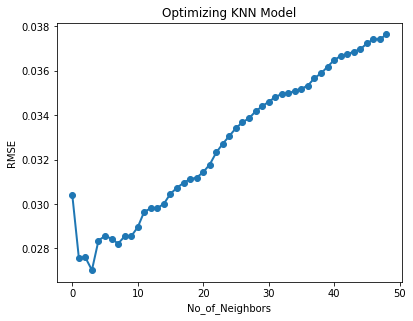

In [291]:
a=[]
for i in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_pred = knn.predict(X_test)
    
    a.append(np.sqrt(metrics.mean_squared_error(y_test,knn_pred)))
    
fig = plt.figure(figsize=(6,6))

axis = fig.add_axes([0.1,0.2,0.8,0.6])
axis.plot(range(49),a, marker ='o',linewidth=2)

axis.set_xlabel('No_of_Neighbors')
axis.set_ylabel('RMSE')
axis.set_title("Optimizing KNN Model")
plt.tight_layout

In [292]:
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train,y_train)
knn.pred = knn.predict(X_test)

In [293]:
print('METRICS FOR HYPERTUNED KNN REGRESSOR:' )
print('Mean Square Error: ' + str(metrics.mean_squared_error(y_test, knn_pred)))
print('Mean Absolute Error: ' + str(metrics.mean_absolute_error(y_test, knn_pred)))
print('R2 Score: ' + str(metrics.r2_score(y_test, knn_pred)))
print('Accuracy: ' + str(100 - (metrics.mean_absolute_error(y_test, knn_pred) * 100) / (np.mean(y_test))) + '%')

METRICS FOR HYPERTUNED KNN REGRESSOR:
Mean Square Error: 0.0014166785290192535
Mean Absolute Error: 0.026429403960408163
R2 Score: 0.9162137897618852
Accuracy: 91.65977327266778%


DescribeResult(nobs=199, minmax=(-471.7659428345079, 20.931285958660308), mean=-8.674309481339353, variance=1791.9355809805104, skewness=-7.671186685016739, kurtosis=73.77166282664581)


Text(0.5,1,'K_NEAREST_NEIGHBORS MODEL')

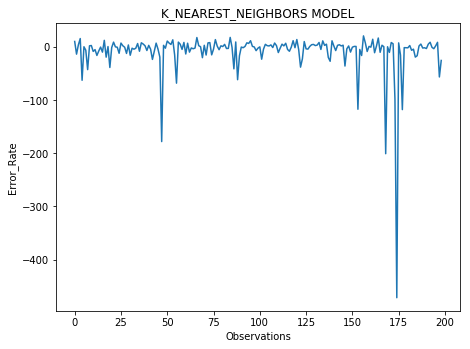

In [294]:
from scipy import stats
error_knn = []
err =0
for i in range(y_test.shape[0]):
    if y_test[y_test.index[i]] != 0:
        err = ((y_test[y_test.index[i]]-knn_pred[i])/y_test[y_test.index[i]])*100
        error_knn.append(err)
        
    else: continue
        
print(stats.describe(error_knn))

fig = plt.figure(figsize=(8,8))

axis = fig.add_axes([0.1,0.2,0.7,0.5])
axis.plot(range(np.size(error_knn)),error_knn)

axis.set_xlabel('Observations')
axis.set_ylabel('Error_Rate')
axis.set_title("K_NEAREST_NEIGHBORS MODEL")

## Threshold Estimation

In [295]:
b=[]; i=0

X1 = df.loc[:,'Acc_x':'Accident']
y1 = df['Composite_Score']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20)

while (i<X1_train.shape[0]):
    
    a=[]
    for j in range(0,50):
        
        if(X1_train['Accident'][X1_train.index[i+j]] == 1):
            if (y1_train[X1_train.index[i+j]] !=0):
                a.append(y1_train[X1_train.index[i+j]])
        
        else: continue
     
    b.append(np.average(a))
    i = i+50

    
threshold = np.average(b)

In [296]:
threshold

0.3641309569624881

In [297]:
air=[]; airbag=[]
for i in range(y1_test.shape[0]):

    if (y1_test[y1_test.index[i]] >= threshold):
        air.append(1)
        
    else: air.append(0)
    
    airbag.append(df['Airbag'][y1_test.index[i]])
    
    

In [298]:
count=0
for i in range(200):
    
    if(air[i] == airbag[i]):
        count = count+1

In [299]:
count

110

In [300]:
count/200

0.55